<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [3]:
# insert code here
import tensorflow as tf
from tensorflow import keras

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [6]:
# insert code here
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [7]:
# insert code here
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


### Split the data (training/test)

In [8]:
# insert code here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [9]:
# insert code here
model = Sequential()

2023-03-07 18:13:13.476556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))
# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [12]:
# insert code here
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [25]:
%%time
# insert code here
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

CPU times: user 1.67 ms, sys: 465 µs, total: 2.13 ms
Wall time: 1.74 ms


In [39]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,
    epochs = 10000,
    verbose = 0)

CPU times: user 4min 51s, sys: 40.2 s, total: 5min 32s
Wall time: 4min 2s


### Create predictions

In [40]:
# insert code here
predictions = model.predict(X_test)

5/5 [==============================] - 0s 1ms/step


### Evaluate the model

In [41]:
# insert code here
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 996us/step - loss: 3135.1453 - mse: 3135.1453

Test loss: 3135.145264


In [42]:
score

[3135.145263671875, 3135.145263671875]

In [43]:
# Find RMSE
score[0] ** (1/2)

55.99236790556259

In [44]:
y.mean()

152.13348416289594

In [45]:
y.std()

77.00574586945044

In [46]:
y.min()

25.0

In [34]:
y.max()

346.0

### Visualisation of cost

In [47]:
# insert code here
history.history

{'loss': [2694.22314453125,
  2701.35205078125,
  2709.905517578125,
  2696.813232421875,
  2697.888916015625,
  2696.714111328125,
  2699.185302734375,
  2696.789306640625,
  2695.156982421875,
  2693.67822265625,
  2696.8525390625,
  2697.958251953125,
  2697.74658203125,
  2696.35791015625,
  2698.257080078125,
  2697.887939453125,
  2697.103271484375,
  2698.180908203125,
  2697.810546875,
  2705.902099609375,
  2698.465087890625,
  2700.6171875,
  2697.620849609375,
  2697.114501953125,
  2699.139404296875,
  2696.029541015625,
  2702.082275390625,
  2698.681884765625,
  2698.68701171875,
  2697.74560546875,
  2698.30712890625,
  2695.268310546875,
  2697.63525390625,
  2697.369384765625,
  2700.54345703125,
  2698.03662109375,
  2698.95654296875,
  2697.10791015625,
  2696.709716796875,
  2700.85498046875,
  2693.2197265625,
  2699.4345703125,
  2697.62451171875,
  2698.60009765625,
  2698.07080078125,
  2697.24853515625,
  2695.8056640625,
  2696.2216796875,
  2698.35205078125,


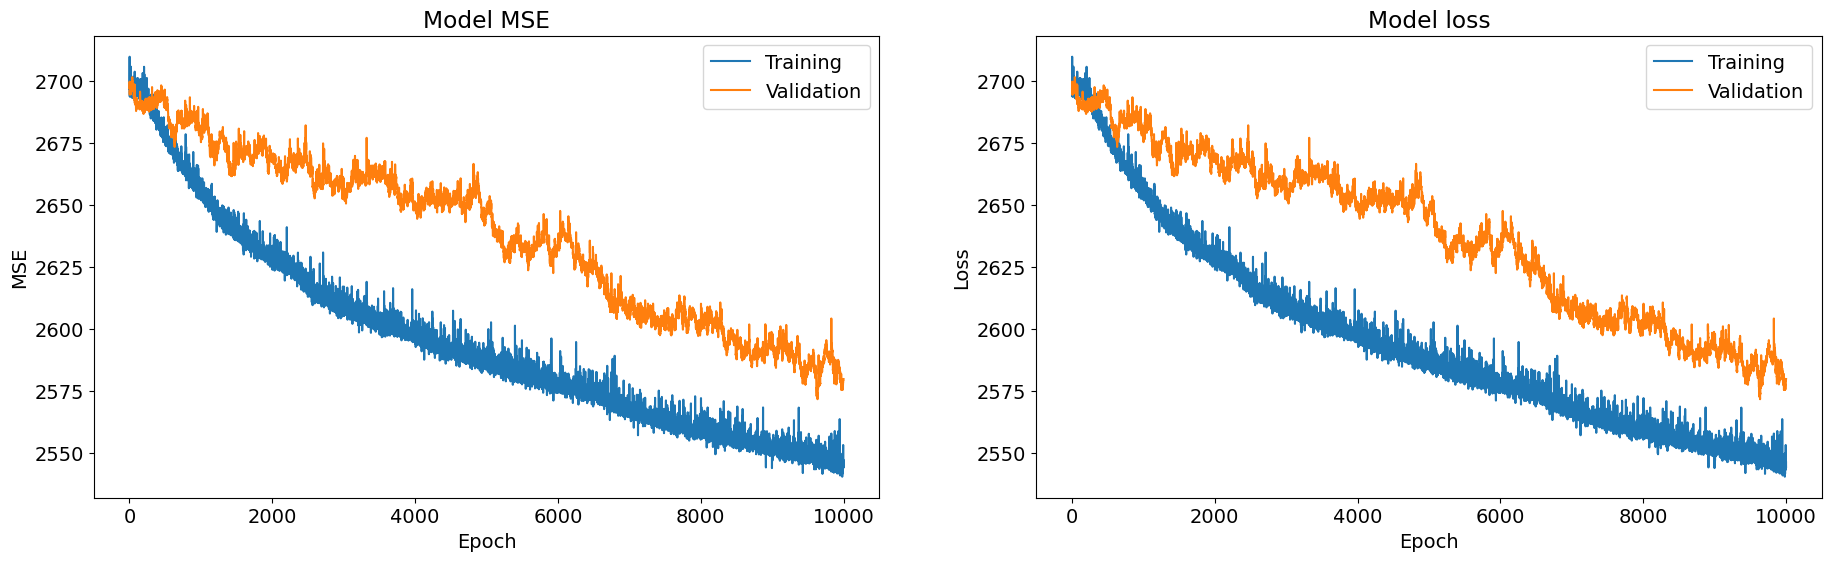

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [49]:
# insert code here
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

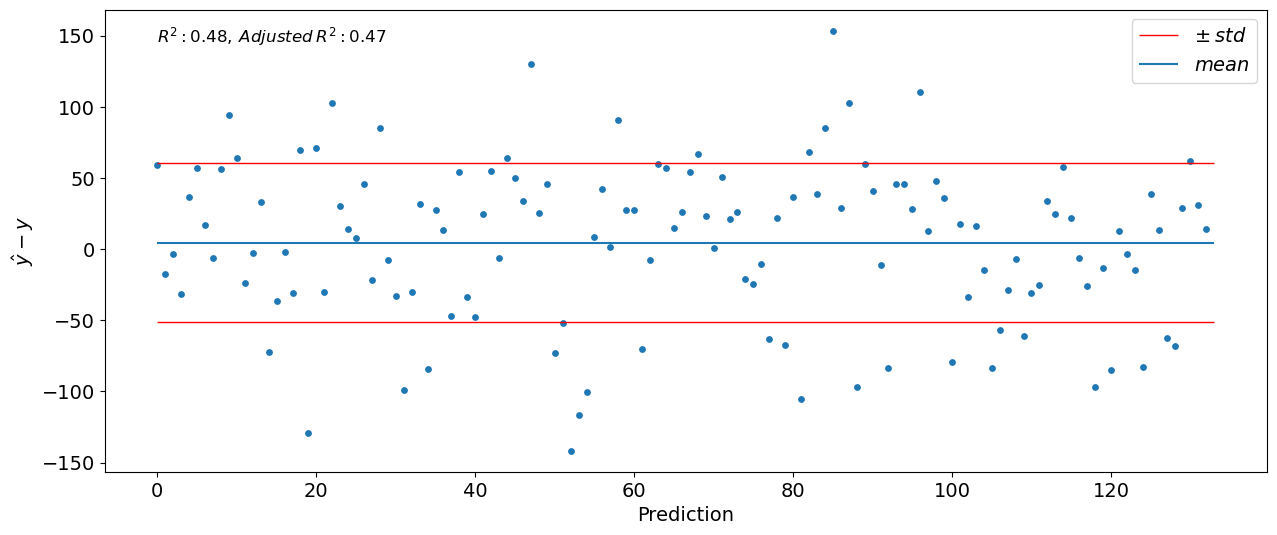

In [50]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



